# Deep Autoencoder for Image Reconstruction using MNIST Dataset
This Jupyter Notebook demonstrates the construction, training, and evaluation of a deep autoencoder on the MNIST dataset, using various hidden layer sizes. The autoencoder is designed to compress input images and reconstruct them as accurately as possible, with two key metrics—Peak Signal-to-Noise Ratio (PSNR) and Structural Similarity Index Measure (SSIM)—used to evaluate the quality of the reconstructions. The main goals of this notebook are:

1) To build a deep autoencoder with flexible hidden layer sizes for dimensionality reduction.                                                           2) To train the model on the MNIST dataset, consisting of handwritten digits.
3) To evaluate the quality of the reconstructed images using PSNR and SSIM.
4) To visualize the original and reconstructed images side by side for different autoencoder architectures.
5) To compare the performance of the autoencoder based on different hidden layer configurations.
The code explores four different hidden layer sizes (256, 128, 64, and 8 neurons) and presents the results in terms of reconstruction quality. The notebook also plots the original and reconstructed images to provide visual insight into the performance of the model at different levels of compression.


## simple autoencoder
We are going to implement an architecture of a simple fully connected autoencoder with a single encoder layer, a single decoder layer, and an arbitrary number (64) of neurons in the hidden layer, we plots the original and reconstructed images to provide visual insight into the performance of the model

Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.2422 - val_loss: 0.1634
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1443 - val_loss: 0.1272
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1187 - val_loss: 0.1090
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1043 - val_loss: 0.0977
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0950 - val_loss: 0.0902
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0887 - val_loss: 0.0853
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0843 - val_loss: 0.0818
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0813 - val_loss: 0.0792
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0792 - val_loss: 0.0776
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0778 - val_loss: 0.0765

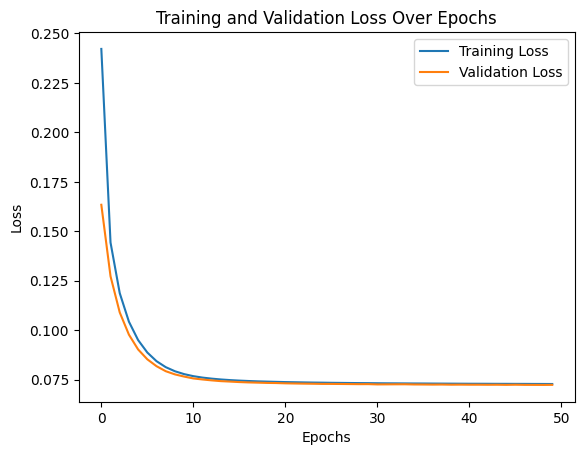

313/313 [==============================] - 0s 926us/step


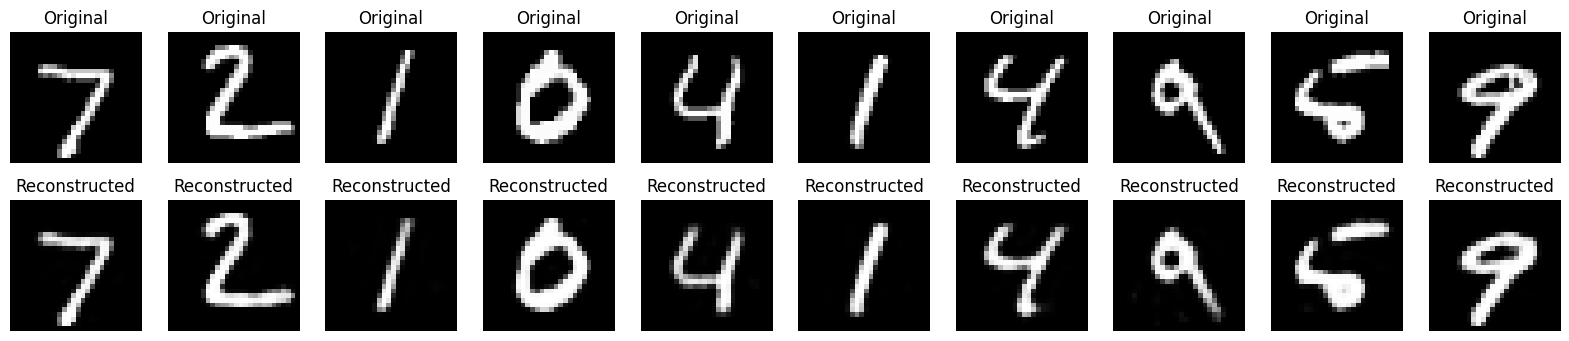

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare the MNIST data
# MNIST data consists of 28x28 grayscale images of handwritten digits
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data: pixel values range from 0 to 255, so we scale them to [0, 1]
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the 28x28 images into vectors of 784 dimensions (28 * 28 = 784)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# Define the parameters of the autoencoder
input_dim = x_train.shape[1]  # This is 784 (28 * 28 pixels)
hidden_dim = 64  # Number of neurons in the hidden layer (compressed representation)

# Build the autoencoder architecture
# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder: Maps the input to a hidden (compressed) representation
encoded = Dense(hidden_dim, activation='relu')(input_layer)

# Decoder: Reconstructs the input from the hidden representation
decoded = Dense(input_dim, activation='sigmoid')(encoded)

# Define the autoencoder model, which maps input to its reconstruction
autoencoder = Model(input_layer, decoded)

# Compile the model
# We use 'adam' optimizer and binary crossentropy as the loss function because we deal with normalized pixel values (0 to 1)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
history = autoencoder.fit(x_train, x_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_data=(x_test, x_test))

# Plot the training and validation loss over epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Function to display original and reconstructed images side by side
def display_images(original, reconstructed, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original images
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed images
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Use the autoencoder to predict (reconstruct) the test images
reconstructed_images = autoencoder.predict(x_test)

# Display a few original and reconstructed images side by side
display_images(x_test, reconstructed_images, num_images=10)


## Deep autoencoder with two hiden layer
We are going to implement a second architecture of a deep autoencoder, this time consisting of two layers in the encoder and two layers in the decoder. Set the number of neurons in the second layer of the encoder to 512.

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1458 - val_loss: 0.0877
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0810 - val_loss: 0.0758
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0743 - val_loss: 0.0718
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0714 - val_loss: 0.0703
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0697 - val_loss: 0.0690
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0687 - val_loss: 0.0684
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0679 - val_loss: 0.0672
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0673 - val_loss: 0.0671
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0669 - val_loss: 0.0668
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0666 - val_loss: 0.0662

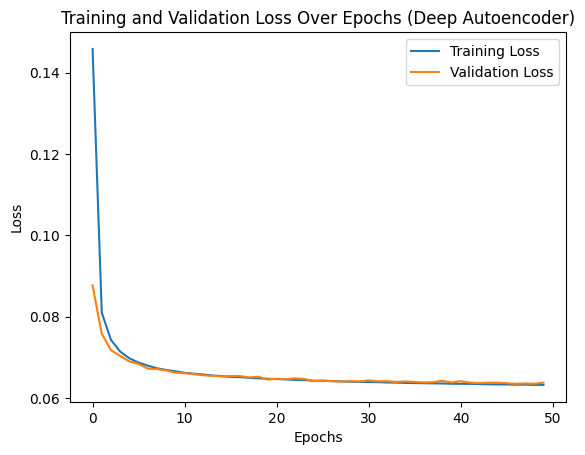

313/313 [==============================] - 0s 531us/step


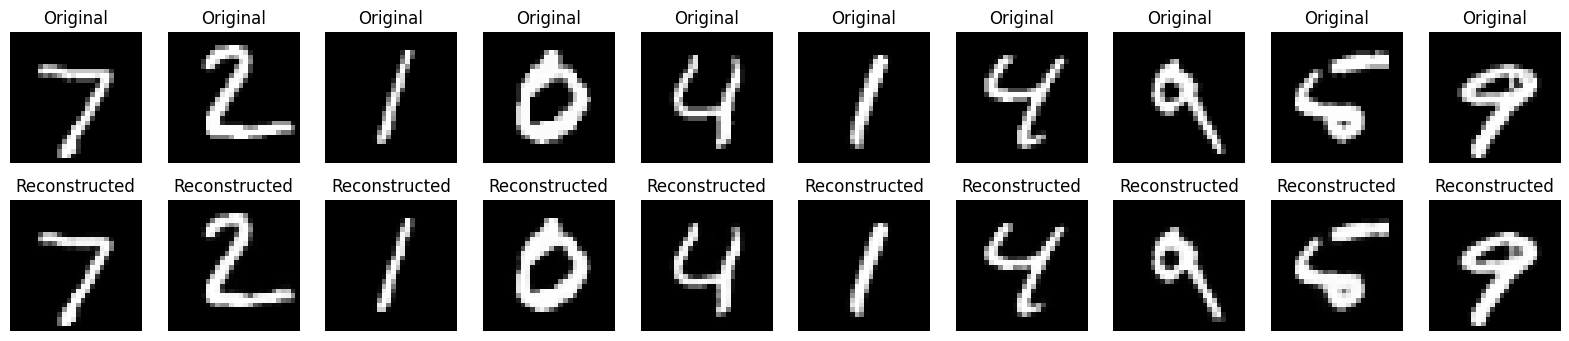

In [4]:
# Define the parameters for the deeper autoencoder
input_dim = x_train.shape[1]  # This is 784 (28 * 28 pixels)
hidden_dim1 = 1024  # Number of neurons in the first layer of the encoder
hidden_dim2 = 512   # Number of neurons in the second layer of the encoder (bottleneck layer)

# Build the deeper autoencoder architecture
# Input layer
input_layer = Input(shape=(input_dim,))

# Encoder: Two layers - First compresses to 1024, then to 512
encoded = Dense(hidden_dim1, activation='relu')(input_layer)
encoded = Dense(hidden_dim2, activation='relu')(encoded)

# Decoder: Two layers - First reconstructs from 512 to 1024, then back to the original 784 dimensions
decoded = Dense(hidden_dim1, activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

# Define the autoencoder model
deep_autoencoder = Model(input_layer, decoded)

# Compile the model
# 'adam' optimizer and binary crossentropy as loss function
deep_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the model
deep_history = deep_autoencoder.fit(x_train, x_train,
                                    epochs=50,
                                    batch_size=256,
                                    shuffle=True,
                                    validation_data=(x_test, x_test))

# Plot the training and validation loss over epochs
plt.plot(deep_history.history['loss'], label='Training Loss')
plt.plot(deep_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs (Deep Autoencoder)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Use the deep autoencoder to predict (reconstruct) the test images
deep_reconstructed_images = deep_autoencoder.predict(x_test)

# Display a few original and reconstructed images side by side for the deep autoencoder
display_images(x_test, deep_reconstructed_images, num_images=10)


For the simple autoencoder, vary the dimension of the hidden layer (256, 128, 64, 8) to explore the impact on the model's performance, then:

1) Compare samples of the input images with those reconstructed for the different models obtained.
2) Measure the quality of the reconstructed images by calculating the two metrics PSNR (Peak Signal-to-Noise Ratio) and SSIM (Structural Similarity Index Measure) between the original images and the reconstructed images."

313/313 [==============================] - 0s 418us/step
Results for hidden layer size 256:


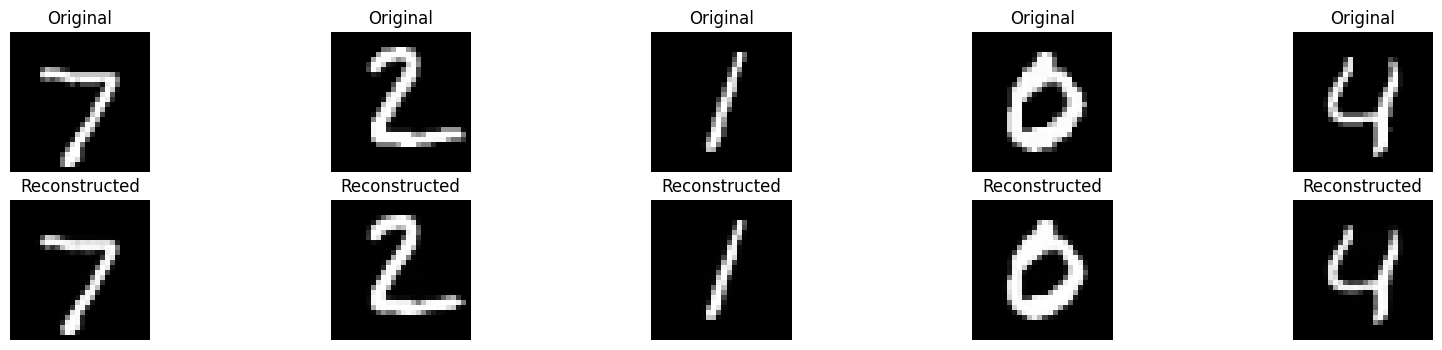

Average PSNR: 30.49, Average SSIM: 0.9796

313/313 [==============================] - 0s 437us/step
Results for hidden layer size 128:


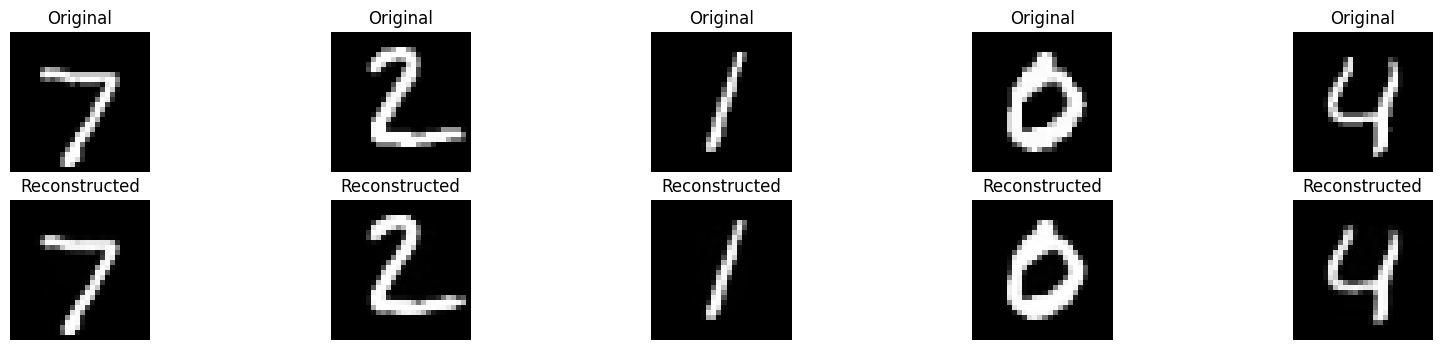

Average PSNR: 29.32, Average SSIM: 0.9758

313/313 [==============================] - 0s 401us/step
Results for hidden layer size 64:


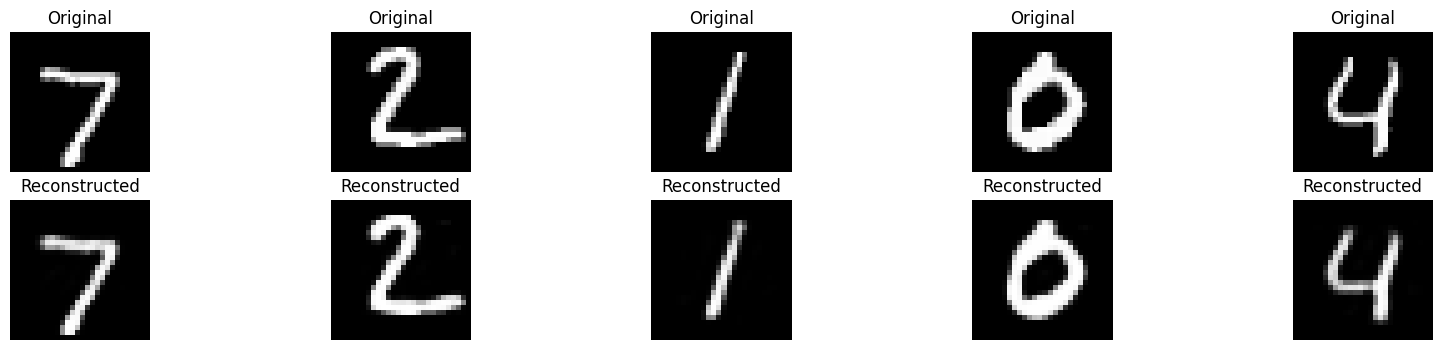

Average PSNR: 26.12, Average SSIM: 0.9507

313/313 [==============================] - 0s 403us/step
Results for hidden layer size 8:


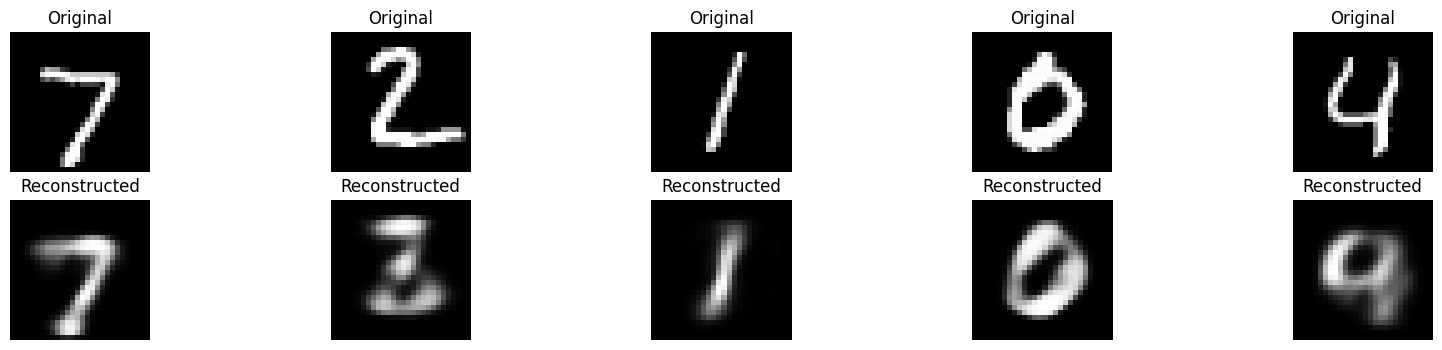

Average PSNR: 15.21, Average SSIM: 0.5383

Summary of PSNR and SSIM results for simple autoencoders:
Hidden Layer: 256 - PSNR: 30.49, SSIM: 0.9796
Hidden Layer: 128 - PSNR: 29.32, SSIM: 0.9758
Hidden Layer: 64 - PSNR: 26.12, SSIM: 0.9507
Hidden Layer: 8 - PSNR: 15.21, SSIM: 0.5383


In [5]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate PSNR and SSIM
def calculate_metrics(original, reconstructed):
    psnr_value = psnr(original, reconstructed, data_range=1)
    ssim_value = ssim(original, reconstructed, multichannel=False, data_range=1)
    return psnr_value, ssim_value

# Function to create, compile and train an autoencoder with a specified hidden layer size
def train_autoencoder(hidden_dim):
    # Build the autoencoder architecture
    input_layer = Input(shape=(input_dim,))
    encoded = Dense(hidden_dim, activation='relu')(input_layer)
    decoded = Dense(input_dim, activation='sigmoid')(encoded)
    
    # Create and compile the model
    autoencoder = Model(input_layer, decoded)
    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    
    # Train the model
    autoencoder.fit(x_train, x_train,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(x_test, x_test), verbose=0)
    
    # Reconstruct the test images
    reconstructed = autoencoder.predict(x_test)
    
    return reconstructed

# Function to display original and reconstructed images
def display_sample_images(original, reconstructed, num_images=10):
    plt.figure(figsize=(20, 4))
    for i in range(num_images):
        # Display original images
        ax = plt.subplot(2, num_images, i + 1)
        plt.imshow(original[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Display reconstructed images
        ax = plt.subplot(2, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')
    plt.show()

# Measure PSNR and SSIM for different hidden layer sizes
hidden_layers = [256, 128, 64, 8]
psnr_results = []
ssim_results = []

for hidden_dim in hidden_layers:
    # Train autoencoder for each hidden layer size
    reconstructed_images = train_autoencoder(hidden_dim)
    
    # Calculate PSNR and SSIM for 10 random samples
    psnr_values = []
    ssim_values = []
    for i in range(10):
        original_image = x_test[i].reshape(28, 28)
        reconstructed_image = reconstructed_images[i].reshape(28, 28)
        psnr_value, ssim_value = calculate_metrics(original_image, reconstructed_image)
        psnr_values.append(psnr_value)
        ssim_values.append(ssim_value)
    
    # Store average PSNR and SSIM for the current model
    psnr_results.append(np.mean(psnr_values))
    ssim_results.append(np.mean(ssim_values))

    # Display sample original and reconstructed images
    print(f"Results for hidden layer size {hidden_dim}:")
    display_sample_images(x_test, reconstructed_images, num_images=5)
    print(f"Average PSNR: {np.mean(psnr_values):.2f}, Average SSIM: {np.mean(ssim_values):.4f}\n")

# Display final results for PSNR and SSIM
print("Summary of PSNR and SSIM results for simple autoencoders:")
for i, hidden_dim in enumerate(hidden_layers):
    print(f"Hidden Layer: {hidden_dim} - PSNR: {psnr_results[i]:.2f}, SSIM: {ssim_results[i]:.4f}")


For the deep autoencoder, vary the dimension of the hidden layer (256, 128, 64, 8) to explore the impact on the model's performance, then:

1) Compare samples of the input images with those reconstructed for the different models obtained.
2) Measure the quality of the reconstructed images by calculating the two metrics PSNR (Peak Signal-to-Noise Ratio) and SSIM (Structural Similarity Index Measure) between the original images and the reconstructed images."

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1731 - val_loss: 0.1051
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0957 - val_loss: 0.0879
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0853 - val_loss: 0.0819
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0805 - val_loss: 0.0786
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0776 - val_loss: 0.0764
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0756 - val_loss: 0.0742
Epoch 7/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0742 - val_loss: 0.0732
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0731 - val_loss: 0.0725
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0722 - val_loss: 0.0714
Epoch 10/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0715 - val_loss: 0.

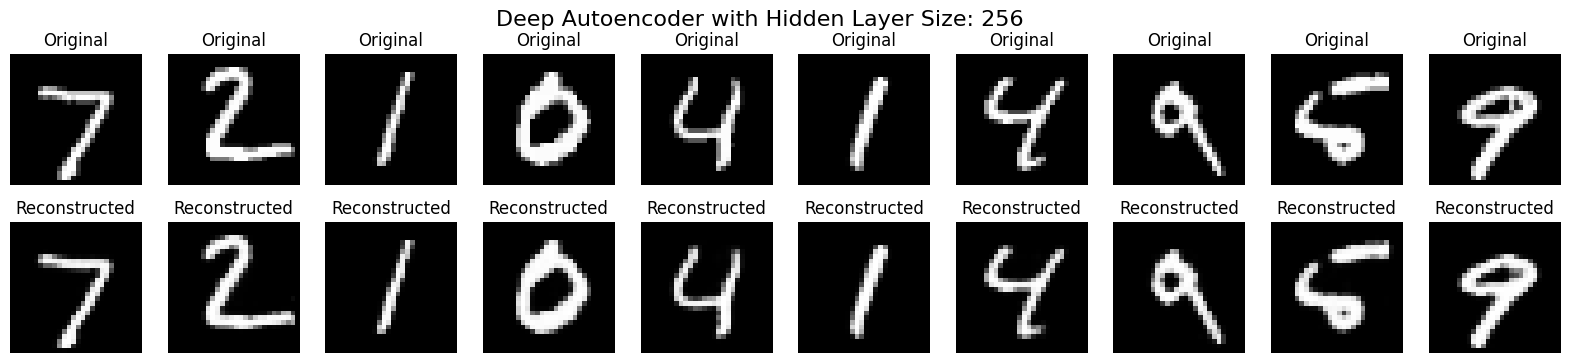

Epoch 1/50
235/235 [==============================] - 3s 2ms/step - loss: 0.1884 - val_loss: 0.1166
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1051 - val_loss: 0.0953
Epoch 3/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0917 - val_loss: 0.0873
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0862 - val_loss: 0.0836
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0828 - val_loss: 0.0814
Epoch 6/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0805 - val_loss: 0.0789
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0787 - val_loss: 0.0775
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0774 - val_loss: 0.0764
Epoch 9/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0763 - val_loss: 0.0754
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0755 - val_loss: 0.0

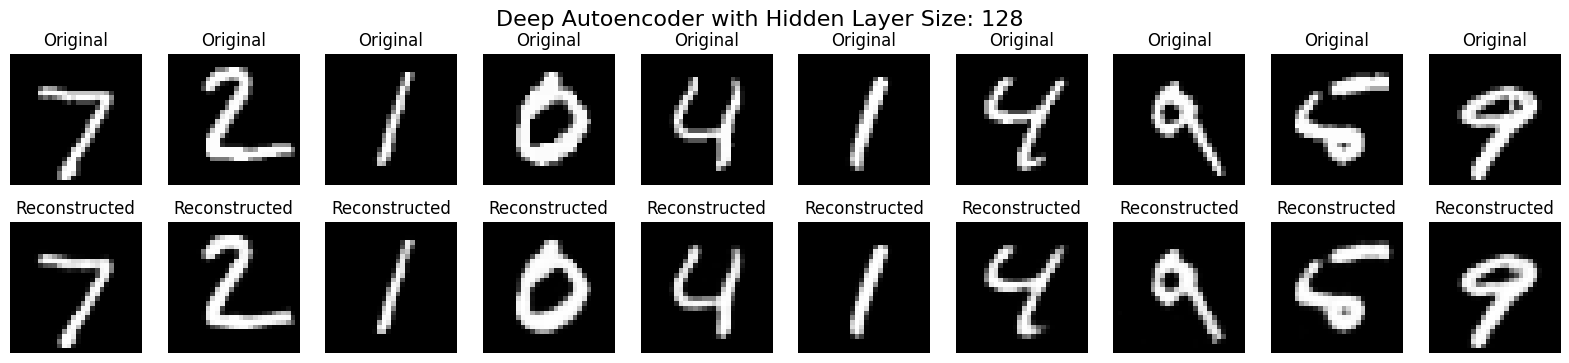

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1909 - val_loss: 0.1231
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1108 - val_loss: 0.1008
Epoch 3/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0980 - val_loss: 0.0941
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0918 - val_loss: 0.0886
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0882 - val_loss: 0.0860
Epoch 6/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0857 - val_loss: 0.0839
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0836 - val_loss: 0.0822
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.0822 - val_loss: 0.0808
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0809 - val_loss: 0.0800
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0798 - val_loss: 0.0

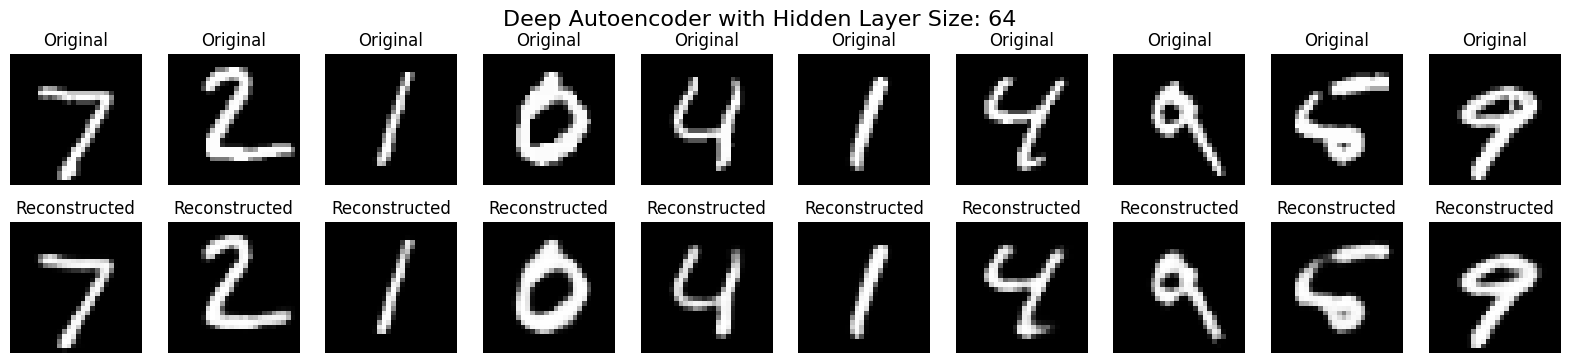

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.2512 - val_loss: 0.1962
Epoch 2/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1848 - val_loss: 0.1757
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1727 - val_loss: 0.1691
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1677 - val_loss: 0.1656
Epoch 5/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1648 - val_loss: 0.1635
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1626 - val_loss: 0.1617
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1609 - val_loss: 0.1602
Epoch 8/50
235/235 [==============================] - 3s 11ms/step - loss: 0.1595 - val_loss: 0.1592
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1583 - val_loss: 0.1586
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1573 - val_loss: 0.1

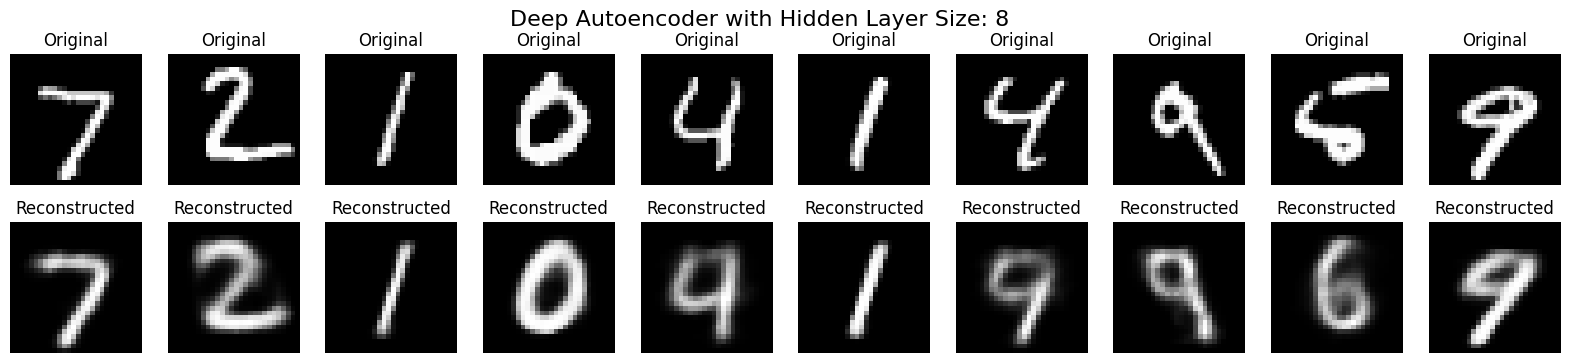

Deep Autoencoder Results:
Architecture | Hidden Layer Size | PSNR   | SSIM
Deep          | 256                | 27.65  | 0.9837
Deep          | 128                | 26.41  | 0.9803
Deep          | 64                | 24.71  | 0.9709
Deep          | 8                | 15.39  | 0.7237


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim

# Load and prepare the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

def train_evaluate_deep_autoencoder(hidden_layer_sizes):
    results = []

    for hidden_dim in hidden_layer_sizes:
        # Define the architecture of the deep autoencoder
        input_layer = Input(shape=(784,))
        encoded = Dense(512, activation='relu')(input_layer)  # First layer with 512 neurons
        encoded = Dense(hidden_dim, activation='relu')(encoded)  # Second layer with variable size
        
        decoded = Dense(hidden_dim, activation='relu')(encoded)
        decoded = Dense(512, activation='relu')(decoded)  # Reconstruction through a layer with 512 neurons
        decoded = Dense(784, activation='sigmoid')(decoded)  # Output layer

        # Create the model
        autoencoder = Model(input_layer, decoded)

        # Compile the model
        autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

        # Train the model
        autoencoder.fit(x_train, x_train,
                        epochs=50,
                        batch_size=256,
                        shuffle=True,
                        validation_data=(x_test, x_test))

        # Reconstruct images from the test set
        reconstructed = autoencoder.predict(x_test)

        # Calculate PSNR and SSIM
        psnr_value = psnr(x_test, reconstructed)
        ssim_value = ssim(x_test.reshape(-1, 28, 28), reconstructed.reshape(-1, 28, 28), multichannel=False, data_range=1)

        results.append((hidden_dim, psnr_value, ssim_value))

        # Display comparison of original and reconstructed images
        n = 10  # Number of images to display
        plt.figure(figsize=(20, 4))
        plt.suptitle(f'Deep Autoencoder with Hidden Layer Size: {hidden_dim}', fontsize=16)
        
        for i in range(n):
            # Original images
            ax = plt.subplot(2, n, i + 1)
            plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
            plt.title("Original")
            plt.axis('off')

            # Reconstructed images
            ax = plt.subplot(2, n, i + n + 1)
            plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
            plt.title("Reconstructed")
            plt.axis('off')
        plt.show()

    return results

# Hidden layer sizes to evaluate
hidden_layer_sizes = [256, 128, 64, 8]

# Train and evaluate the deep autoencoder
deep_results = train_evaluate_deep_autoencoder(hidden_layer_sizes)

# Display results summary
print("Deep Autoencoder Results:")
print("Architecture | Hidden Layer Size | PSNR   | SSIM")
for hidden_dim, psnr_value, ssim_value in deep_results:
    print(f"Deep          | {hidden_dim}                | {psnr_value:.2f}  | {ssim_value:.4f}")


## Conclusion : 
The choice between a simple autoencoder and a deep autoencoder depends on the main objective: if pixel-to-pixel reconstruction accuracy is prioritized, the simple autoencoder is preferable. On the other hand, if the goal is to preserve the structure and perceptual quality of the images, the deep autoencoder provides better performance, especially with smaller hidden layer sizes